In [1]:
%matplotlib inline
import scipy.fftpack as fft
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# first test fft and rfft and its reverses
N = 10000
x = np.random.rand(10000)
x=x/x.mean()
yi_np = np.fft.fft(x)
yr_np = np.fft.rfft(x)
yi_sci = fft.fft(x)
yr_sci =fft.rfft(x)

In [3]:
print(yi_np.shape)
print(yr_np.shape)
print(yi_sci.shape)
print(yr_sci.shape)

(10000,)
(5001,)
(10000,)
(10000,)


In [4]:
# normalization constant is N for all ffts
yr_np

array([ 1.00000000e+04 +0.j        ,  4.51464265e+00-53.43628973j,
       -5.14720100e+01-65.21954005j, ..., -4.85295213e+01+57.6276886j ,
       -8.53988034e+01-87.02861626j,  1.66075105e+01 +0.j        ])

In [5]:
# scipy real fft has weird data format
yr_sci

array([ 1.00000000e+04,  4.51464265e+00, -5.34362897e+01, ...,
       -8.53988034e+01, -8.70286163e+01,  1.66075105e+01])

In [6]:
yi_np

array([ 1.00000000e+04 +0.j        ,  4.51464265e+00-53.43628973j,
       -5.14720100e+01-65.21954005j, ...,  2.76164944e+00 +7.06600527j,
       -5.14720100e+01+65.21954005j,  4.51464265e+00+53.43628973j])

In [7]:
yi_sci

array([ 1.00000000e+04 +0.j        ,  4.51464265e+00-53.43628973j,
       -5.14720100e+01-65.21954005j, ...,  2.76164944e+00 +7.06600527j,
       -5.14720100e+01+65.21954005j,  4.51464265e+00+53.43628973j])

In [8]:
# lets try to do a backwards real fft with a Gaussian distribtion
# 1/sqrt(2*Pi*sigma^2)*exp(-x^2/2/sigma^2)
def gaussian(x,sigma):
    return np.exp(-x**2/2/sigma**2)/np.sqrt(2*np.pi)/sigma

/Users/hstrey/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


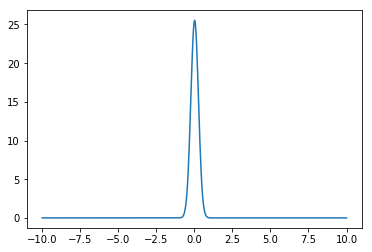

In [26]:
x = np.linspace(-10,10,512)
g = np.fft.fft(np.fft.fftshift(gaussian(x,0.5)))
plt.plot(x,np.fft.fftshift(g))
#plt.xlim((-2,2))

In [10]:
g_ffti = np.fft.fft(g)
g_fftr = np.fft.rfft(g)

In [11]:
g_fftr

array([ 2.55500000e+01+0.00000000e+00j,  2.52374659e+01+1.54857094e-01j,
        2.43226149e+01+2.98498376e-01j,  2.28709634e+01+4.21050980e-01j,
        2.09830362e+01+5.15104627e-01j,  1.87828664e+01+5.76431990e-01j,
        1.64045785e+01+6.04216403e-01j,  1.39790590e+01+6.00790519e-01j,
        1.16225239e+01+5.70977987e-01j,  9.42828282e+00+5.21190887e-01j,
        7.46232884e+00+4.58458266e-01j,  5.76269697e+00+3.89545841e-01j,
        4.34196970e+00+3.20282926e-01j,  3.19195958e+00+2.55154436e-01j,
        2.28948369e+00+1.97158548e-01j,  1.60223895e+00+1.47886050e-01j,
        1.09402326e+00+1.07751886e-01j,  7.28845279e-01+7.63033025e-02j,
        4.73754815e-01+5.25384196e-02j,  3.00456364e-01+3.51875276e-02j,
        1.85916799e-01+2.29306500e-02j,  1.12244557e-01+1.45437851e-02j,
        6.61182501e-02+8.97993469e-03j,  3.80002795e-02+5.39872540e-03j,
        2.13089270e-02+3.16088073e-03j,  1.16585809e-02+1.80256484e-03j,
        6.22356299e-03+1.00137976e-03j,  3.24146804

(0, 100)

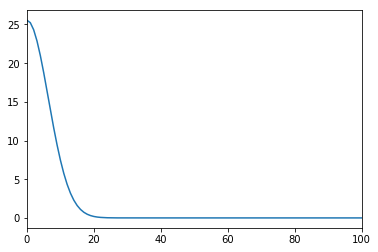

In [12]:
g_fftr = np.real(g_fftr) +0j
plt.plot(np.real(g_fftr))
#plt.plot(np.imag(g_fftr))
plt.xlim((0,100))

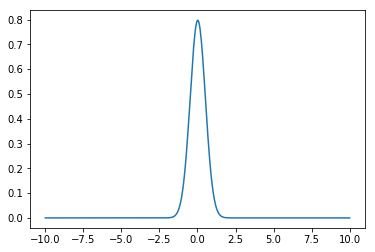

In [13]:
x_back = np.fft.irfft(g_fftr)
plt.plot(x,np.fft.fftshift(x_back))

In [14]:
help(fft)

Help on package scipy.fftpack in scipy:

NAME
    scipy.fftpack

DESCRIPTION
    Discrete Fourier transforms (:mod:`scipy.fftpack`)
    
    Fast Fourier Transforms (FFTs)
    
    .. autosummary::
       :toctree: generated/
    
       fft - Fast (discrete) Fourier Transform (FFT)
       ifft - Inverse FFT
       fft2 - Two dimensional FFT
       ifft2 - Two dimensional inverse FFT
       fftn - n-dimensional FFT
       ifftn - n-dimensional inverse FFT
       rfft - FFT of strictly real-valued sequence
       irfft - Inverse of rfft
       dct - Discrete cosine transform
       idct - Inverse discrete cosine transform
       dctn - n-dimensional Discrete cosine transform
       idctn - n-dimensional Inverse discrete cosine transform
       dst - Discrete sine transform
       idst - Inverse discrete sine transform
       dstn - n-dimensional Discrete sine transform
       idstn - n-dimensional Inverse discrete sine transform
    
    Differential and pseudo-differential operators
  

In [15]:
help(fft.fft)

Help on function fft in module scipy.fftpack.basic:

fft(x, n=None, axis=-1, overwrite_x=False)
    Return discrete Fourier transform of real or complex sequence.
    
    The returned complex array contains ``y(0), y(1),..., y(n-1)`` where
    
    ``y(j) = (x * exp(-2*pi*sqrt(-1)*j*np.arange(n)/n)).sum()``.
    
    Parameters
    ----------
    x : array_like
        Array to Fourier transform.
    n : int, optional
        Length of the Fourier transform.  If ``n < x.shape[axis]``, `x` is
        truncated.  If ``n > x.shape[axis]``, `x` is zero-padded. The
        default results in ``n = x.shape[axis]``.
    axis : int, optional
        Axis along which the fft's are computed; the default is over the
        last axis (i.e., ``axis=-1``).
    overwrite_x : bool, optional
        If True, the contents of `x` can be destroyed; the default is False.
    
    Returns
    -------
    z : complex ndarray
        with the elements::
    
            [y(0),y(1),..,y(n/2),y(1-n/2),...,y(-

In [16]:
help(fft.rfft)

Help on function rfft in module scipy.fftpack.basic:

rfft(x, n=None, axis=-1, overwrite_x=False)
    Discrete Fourier transform of a real sequence.
    
    Parameters
    ----------
    x : array_like, real-valued
        The data to transform.
    n : int, optional
        Defines the length of the Fourier transform.  If `n` is not specified
        (the default) then ``n = x.shape[axis]``.  If ``n < x.shape[axis]``,
        `x` is truncated, if ``n > x.shape[axis]``, `x` is zero-padded.
    axis : int, optional
        The axis along which the transform is applied.  The default is the
        last axis.
    overwrite_x : bool, optional
        If set to true, the contents of `x` can be overwritten. Default is
        False.
    
    Returns
    -------
    z : real ndarray
        The returned real array contains::
    
          [y(0),Re(y(1)),Im(y(1)),...,Re(y(n/2))]              if n is even
          [y(0),Re(y(1)),Im(y(1)),...,Re(y(n/2)),Im(y(n/2))]   if n is odd
    
        

In [17]:
help(np.fft.fft)

Help on function fft in module mkl_fft._numpy_fft:

fft(a, n=None, axis=-1, norm=None)
    Compute the one-dimensional discrete Fourier Transform.
    
    This function computes the one-dimensional *n*-point discrete Fourier
    Transform (DFT) with the efficient Fast Fourier Transform (FFT)
    algorithm [CT].
    
    Parameters
    ----------
    a : array_like
        Input array, can be complex.
    n : int, optional
        Length of the transformed axis of the output.
        If `n` is smaller than the length of the input, the input is cropped.
        If it is larger, the input is padded with zeros.  If `n` is not given,
        the length of the input along the axis specified by `axis` is used.
    axis : int, optional
        Axis over which to compute the FFT.  If not given, the last axis is
        used.
    norm : {None, "ortho"}, optional
        .. versionadded:: 1.10.0
        Normalization mode (see `numpy.fft`). Default is None.
    
    Returns
    -------
    out :

In [18]:
help(np.fft.rfft)

Help on function rfft in module mkl_fft._numpy_fft:

rfft(a, n=None, axis=-1, norm=None)
    Compute the one-dimensional discrete Fourier Transform for real input.
    
    This function computes the one-dimensional *n*-point discrete Fourier
    Transform (DFT) of a real-valued array by means of an efficient algorithm
    called the Fast Fourier Transform (FFT).
    
    Parameters
    ----------
    a : array_like
        Input array
    n : int, optional
        Number of points along transformation axis in the input to use.
        If `n` is smaller than the length of the input, the input is cropped.
        If it is larger, the input is padded with zeros. If `n` is not given,
        the length of the input along the axis specified by `axis` is used.
    axis : int, optional
        Axis over which to compute the FFT. If not given, the last axis is
        used.
    norm : {None, "ortho"}, optional
        .. versionadded:: 1.10.0
        Normalization mode (see `numpy.fft`). Defa

In [19]:
help(np.fft)

Help on package numpy.fft in numpy:

NAME
    numpy.fft

DESCRIPTION
    Discrete Fourier Transform (:mod:`numpy.fft`)
    
    .. currentmodule:: numpy.fft
    
    Standard FFTs
    -------------
    
    .. autosummary::
       :toctree: generated/
    
       fft       Discrete Fourier transform.
       ifft      Inverse discrete Fourier transform.
       fft2      Discrete Fourier transform in two dimensions.
       ifft2     Inverse discrete Fourier transform in two dimensions.
       fftn      Discrete Fourier transform in N-dimensions.
       ifftn     Inverse discrete Fourier transform in N dimensions.
    
    Real FFTs
    ---------
    
    .. autosummary::
       :toctree: generated/
    
       rfft      Real discrete Fourier transform.
       irfft     Inverse real discrete Fourier transform.
       rfft2     Real discrete Fourier transform in two dimensions.
       irfft2    Inverse real discrete Fourier transform in two dimensions.
       rfftn     Real discrete Fourie